# Big Data Processes Exercises - Week 05
# <font color= Pink>Evaluation</font>

#### What we will cover today

<ol>
    <li>Importing packages and libraries</li>
    <li>Loading the dataset</li>
    <li>Selecting target features</li>
    <li>Splitting the data</li>
    <li>1st Modeling</li>
    <li>Evaluation</li>
    <ol>
        <li>Confusion Matrix</li>
        <li>Scores & Metrics</li>
    </ol>
    <li>Oversampling</li>
    <ol>
        <li>Random Oversampling</li>
        <li>SMOTE</li>
    </ol>
    <li>Undersamling</li>
    <ol>
        <li>Random Undersampling</li>
        <li>TomekLinks</li>
    </ol>
    <li>Combination of over- & undersampling</li>
    <ol>
        <li>SMOTE & TomekLinks</li>
    </ol>
    <li>Evaluation</li>
</ol>

***
***

## Evaluation Metrics - look up
A 'quick' recap from Bruce & Bruce and [machinelearningmastery.com](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python//):

**<font color= Orchid>Accuracy</font>**<br>
The percent (or proportion) of cases classified correctly. Being the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class. Why is this? Think of a dataset on sunny days in Hawaii. The distribution of sunny vs. not-sunny days would probably be quite unbalanced (e.g., 95% sunny days and 5% not-sunny days). A classifier model trying to predict whether a day will be sunny could receive a very high accuracy by simply always predicting the biggest class (sunny). As such, the accuracy metric does not reflect the model's ability to correctly classificy the smallest class (not-sunny days).

Furthermore, the accuracy metric 'assumes' that all predictions and prediction errors are equally important. What do we mean by this? Imagine that we are trying to predict a medical condition. Here, we might have a model which is overall pretty accurate. However, when we take a closer look at the model, we see that there is a lot of 'false negatives' (i.e., patients being misclassified as healthy although they actually have the diagnosis). This misclassification is much more critical than a 'false positive' (i.e., a patient being classified as having the condition, although they are healthy). The accuracy metric itself does not account for this, but treats all false predictions equally. However, as the example shows, certain types of errors might be more costly or harmful than others. The metrics below are ways to address the limitations of the accuracy metric.

**<font color= Orchid>Confusion matrix</font>**<br>
A tabular display (2×2 in the binary case) of the record counts by their predicted and actual classification status. In other words, it shows the amount of true positive and true negative predictions as well as false positive and false negative predictions made by the model. What does these terms mean? Think of our IBM classification model predicting attrition (i.e. whether an employee will leave the company). In this dataset, the value '1' means 'true' = the employee did leave the company, while the value '0' means 'false' = the employee did not leave the company:
- We say a prediction is a *<font color= Orchid>true positive</font>* when the model predicts '1' and the correct class is indeed '1' (the employee actually left the company). 
- We say a prediction is a *<font color= Orchid>true negative</font>*, when the model predicts '0' and the correct class is indeed '0' (the employee did not leave). 
- Similarly, a *<font color= Orchid>false positive</font>* prediction is when the model predicts '1', when the correct class is actually '0' (i.e., the employee is predicted to have left the company, but in fact did not leave). 
- A *<font color= Orchid>false negative</font>* prediction is when the model predicts '0', when the correct class is actually '1' (i.e., the employee is predicted to stay, but in fact left the comapny).

**<font color= Orchid>Recall</font>** - minimizing false negatives <br>
This metric is also called sensitivity or 'true positive rate'. It signifies the percent (or proportion) of all '1's that are correctly classified as '1's. In other words, it answers the question: <font color= Orchid>*"Of all the instances in the test data that belong to '1', how many did the model correctly predict as '1'?"</font>*. In the case of the IBM dataset, we take all the employees that left the company and calculate how many the model predicted correctly as having left the company.

Recall is particularly useful in situations where the cost of missing a positive instance (i.e., making a false negative prediction) is high. For example, in medical diagnostics, as described above, recall tells us the percentage of all actual patients with the disease that the model correctly identifies as having the disease. Thus, a high recall means the model is effectively identifying a large portion of patients with a certain condition, minimizing the number of cases where the condition goes undetected. We can optimize our models for high recall, which means that we focus on minimizing false negatives. However, we must be mindful that this may come at the expense of precision (see below), as the model may classify more instances as positive, including some that are actually negative. In other words, a model with high recall may classify more patients as having the condition when they are in fact healthy. 

**<font color= Orchid>Precision</font>** - minimizing false positives <br>
The percent (proportion) of true positives (instances predicted as '1', which are in fact '1') out of all the positive predictions made by the model. It answers the question: *<font color= Orchid>"Of all the instances in the test data predicted as '1' by the model, how many in this group are in fact '1'?"*</font>. In the case of the IBM dataset, we take all the employees that was predicted to have left the company and assess how many of these in fact left.

Precision helps us to assess whether the positive predictions made by our model are accurate. High precision indicates that the model makes fewer false positive predictions, minimizing the number of instances incorrectly classified as positive. It is important in situations where false positives have high costs or consequences.

**<font color= Orchid>Recall vs. Precision</font>**<br>
In recall, we first *<font color= Orchid>group together all the positive instances</font>* in our test dataset and then, we figure out how many of these have been correctly predicted as positive by our model. (Recall: How many of the positive items were identified correctly?)
<br>
In precision, we first *<font color= Orchid>group together all the instances that our model predicted to be positive</font>* and then, we figure out how many of these were in fact positive. (Precision: How many of the items predicted to be positive are actually positive?)


**<font color= Orchid>Specificity</font>* <br>
The percent (or proportion) of all 0s that are correctly classified as 0s. It measures the ability of a model to correctly identify negative instances (true negatives) out of all actual negative instances.  In other words, specificity answers the question: *<font color= Orchid>"Of all the instances that truly belong to the negative class, how many did the model correctly predict as negative?"</font>*. While recall measures the model's ability to identify positive instances, specificity complements this by measuring the model's ability to identify negative instances. A high specificity value indicates that the model is good at avoiding false positives and accurately classifying negative instances. Conversely, a low specificity value suggests that the model is incorrectly classifying negative instances as positive, leading to false alarms. To return to our medical example, if specificity is high, it means the model is good at correctly identifying healthy patients as healthy, minimizing the number of healthy patients mistakenly classified as having a disease.

**<font color= Orchid>Area Under ROC curve</font>** <br>
Is also called AUC-ROC for short. The AUC-ROC score ranges from 0 to 1 where:
- AUC-ROC = 1 indicates a perfect classifier that achieves perfect separation between positive and negative instances.
- AUC-ROC = 0.5 indicates a classifier that performs no better than random guessing.
- AUC-ROC < 0.5 indicates a classifier that performs worse than random guessing.

In other words, it's a number that tells you how well your model can separate positive cases from negative cases overall. The higher the AUC-ROC, the better the model is at this task. If the AUC-ROC is 1, it means the model is perfect. If it's 0.5, it's no better than flipping a coin.
It is a great performance metric for binary classification problems.

Below, the ROC curve is pictured. The AUC-ROC is like a summary score for this graph.

<img src="roc.jpg" width="500"/>

**<font color= Orchid>F1 curve</font>** <br>
The F1 score is a single metric that combines both precision and recall into one value, providing a balanced measure of a model's performance, especially in situations where there is an imbalance between the classes. In words, the F1 score is the harmonic mean of precision and recall. The harmonic mean gives more weight to low values. This means that the F1 score will be high only if both precision and recall are high.

***
***
*** 



## 1. Importing various packages and libraries

Install the imblearn library if you don't have it yet 

In [4]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.metrics import roc_auc_score


#Sampling libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

***
***
## 2. Loading dataset and examining the data

In this notebook, we will again be using the **IBM-employee-attrition dataset** where we will try and predict if an employee has attrition or not, aka. whether they have left the company or not. 

As we have explained before, our target variable, attrition, is either be 0 or 1:
- 0 = No attrition, the employee did not leave the company
- 1 = Attrition, the employee left the company

Let's load the dataset into our notebook:

In [6]:
df = pd.read_csv("IMB-Employee-Attrition.csv", delimiter=',')

It is the same dataset as last week, but feel free to explore it yet again!

In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


***
***
## 3. Selecting target features

We will select the same features as we've used before for our models (go back to the notebook for week 3, if you need a refresher as to how we got these features):

In [8]:
#Create the feature and target variables
#From list of feature(s) 'X', the model will guess/predict the 'y' feature (our target)
X = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']].values

y = df['Attrition'].values

***
***
## 4. Splitting the dataset



We split the data as usual, such that we have some data to train the model, and some data to test the accuracy of our models:

In [9]:
# split data into test and train - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***
***

## 5. 1st Modelling - Ordinary Decision Tree with no sampling

In [10]:
# Decision Tree Classificer _ No Sampling
DTC_ns = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)

In [11]:
DTC_ns.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [12]:
DTC_ns_pred = DTC_ns.predict(X_test)

In [13]:
print("Accuracy: ", metrics.accuracy_score(y_test, DTC_ns_pred))

Accuracy:  0.8469387755102041


In [14]:
mtr = confusion_matrix(y_test, DTC_ns_pred)

print("Correct predictions:", (mtr[0,0] + mtr[1,1]))
print("Incorrect predictions:", (mtr[0,1] + mtr[1,0]))
print("Total predictions:", (mtr.sum()))

Correct predictions: 249
Incorrect predictions: 45
Total predictions: 294


As you can see, our decision tree classifier with a max depth of 6 has an accuracy of ~85%. However, as noted in the beginning, the accuracy score alone is not enough to truly evaluate the performance of a model. So, now, let us evaluate this model utilizing our new metrics!

***
***
## 6. Evaluation

In this section, we will be focusing on:
- Accuracy score
- Confusion matrix
- AUC-RUC
- Precision
- Recall
- F1 score

If you are unsure of what these metrics are, go back to the introductory section of this notebook, where we define the terms.

**Accuracy** is calculated by the number of correct predictions divided by the total number of predictions, so:

<font color=Orchid> Accuracy = Correct Predictions / Total Predictions </font>

In [15]:
print("Accuracy: ", metrics.accuracy_score(y_test, DTC_ns_pred))

Accuracy:  0.8469387755102041


We can see  that our model is doing pretty good with ~85% accuracy. But a problem with accuracy within classification is that it hides a lot of the details, which you need know, to better understand the performance of your model. 

When your data has two or more classes to predict, the accuracy score will never know if the classes are being predicted equally well or whether one or two classes are being neglected by the model based on accuracy.

Let us take a look at the class distribution in the IBM dataset, when it comes to Attrition:


In [16]:
df.groupby(['Attrition']).Attrition.count()

Attrition
0    1233
1     237
Name: Attrition, dtype: int64

We can see that 237 of employees (19%) in the dataset left the company. 

**237 ÷ 1233 = 0.1922 = 19.22%**

This means that we are working with an imbalanced dataset. Therefore we cannot use accuracy as a good performance metric. Because our model learned on our training data that there are more 'No  Attrition' instances than 'Attrition' instances, it will always rather predict 'No Attrition', since there is a better chance it will be correct. 

### 6.1 Confusion matrix

Since we have now found out that accuracy score alone is not a good metric for the IBM dataset, we will use a confusion matrix to further evaluate our model. As you may recall, the confusion matrix shows the amount of true positive and true negative predictions as well as the amount of false positive and false negative predictions made by the model.

The confusion matrix is the basis for many of the evaluation matricies. It provides more insight into not only the performance of the model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.

Now, let's make a confusion matrix!


In [17]:
cf_matrix = confusion_matrix(y_test, DTC_ns_pred)

print("Confusion matrix for the Decision Tree Classifier with No Sampling on test set: \n\n", cf_matrix)

Confusion matrix for the Decision Tree Classifier with No Sampling on test set: 

 [[245  10]
 [ 35   4]]


Confusion matrix with ✨ visualisation ✨

<Axes: >

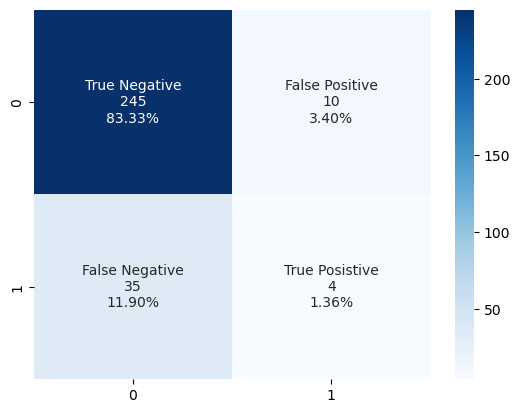

In [18]:
group_names = ['True Negative','False Positive','False Negative','True Posistive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')


- **True positive** for correctly predicted target values (correctly predicted 'Attrition')
- **False positive** for incorrectly predicted target values (incorrectly predicted 'Attrition')
- **True negative** for correctly predicted no-event values (correctly predicted 'No Attrition')
- **False negative** for incorrectly predicted no-event values (incorrectly predicted 'No Attrition')

### **<font color=turquoise>EXERCISE 1</font>**
Explain what you can conclude from the confusion matrix visualized above. What does the confusion matrix tell you about the model, that you couldn't see from the accuracy score alone? 

Also, imagine our model was classifiying patients according to whether they had a diagnosis of some sort. How many patients would have been classified as healthy although they actually had the condition and needed treatment?b

<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Type in your answers here:**

We can see that the actual number of employees who left IBM is 237 (where attrition is 1).

- True negative: There were 245 employees that we correctly predicted 'no attrition'.
- False positive: There were 10 employees that we predicted to leave the company, but who actually did not leave (no attrition).
- False negative: There were 35 employees that we predicted to stay at the company (no attrition), but who actually left the company.
- True positive: There were 4 employees that we correctly predicted as 'attrition'.

The confusion matrix tells us how many employees we incorrectly predicted and whether it was a false positive or a false negative. This information cannot be obtained from the accuracy score alone.

When classifying patients for a diagnosis, it is generally more acceptable to have a higher number of false positives (predicting a patient has the condition when they don't) than false negatives (predicting a patient doesn't have the condition when they actually do). This is because it is better to be cautious and recommend further testing or treatment for a patient who may not have the condition, rather than missing a diagnosis and not providing necessary treatment.

<div style="width: 100%; height: 1px; background-color: white;"></div>

### 6.2 Scores & Metrics

From the confusion  matrix we can calculate other scores that we can use as our metrics.

- **Precision**. Calculated by: <font color=Orchid> TruePositive / (TruePositive + FalsePositive)  </font>
- **Recall**. Calculated by: <font color=Orchid> TruePositive / (TruePositive + FalseNegative)</font>
- **F1 Score**. Calculated by: <font color=Orchid>(2 * Precision * Recall) / (Precision + Recall)</font>
- **ROC-AUC**. ROC plots the True Positive rate (TPR) against the False Positive rate (FPR). The ROC-AUC (area under the ROC curve)  then sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds. 

In [19]:
# Precision 
precision = precision_score(y_test, DTC_ns_pred) 
# Recall 
recall = recall_score(y_test, DTC_ns_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_ns_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_ns_pred) 
roc_auc = auc(fpr, tpr) 
 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("AUC-ROC:", roc_auc) 


Precision: 0.2857142857142857
Recall: 0.10256410256410256
F1-Score: 0.1509433962264151
AUC-ROC: 0.5316742081447964


### **<font color=turquoise>EXERCISE 2</font>**
Revisit the explanations in the introduction of this notebook (or look up the metrics on the internet). Then explain what each of these values tells us about the model

<div style="width: 100%; height: 1px; background-color: white;">
    <p style="color: black; text-align: center"><b>ANSWER</b></p>
</div>

**Your explanations go here:**

It is important to note that accuracy can be misleading when the dataset is imbalanced, meaning that one class has significantly more instances than the other. In such cases, a high accuracy can be achieved by simply predicting the majority class most of the time.

Precision (minimising false positives), predicted true, actual false and true: a precision of 0.2857 means that out of all the instances that were predicted as true, only 28.57% of them were actually true. The remaining 71.43% were false positives.

Recall (minimising false negatives), predicted true and false, actually true: only 10% of the actual true cases were correctly identified as true by the model. In other words, the model has a low ability to correctly identify positive instances. This means that a large number of true cases are being classified as false negatives.

F1-Score (combines precision and recall): An F1 score of 0.15 indicates that the model's performance is relatively poor in terms of both precision and recall. 


AUC-ROC: The AUC-ROC (Area Under the Receiver Operating Characteristic) score is a metric used to evaluate the performance of a binary classification model. It measures the ability of the model to distinguish between positive and negative instances. 
An AUC-ROC score of 53 indicates that the model's performance is slightly better than random guessing.

<div style="width: 100%; height: 1px; background-color: white;"></div>

There are also other metrics out there. If you are confused about which one to use, let this be your guide. 

    Are you predicting probabilities?
        Do you need class labels?
            Is the minority class more important?
                Use Precision-Recall AUC
            Are both classes important?
                Use ROC AUC
        Do you need probabilities?
            Use Brier Score and Brier Skill Score
    Are you predicting class labels?
        Is the minority class more important?
            Are False Negatives and False Positives Equally Important?
                Use F1-Measure
            Are False Negatives More Important?
                Use F2-Measure
            Are False Positives More Important?
                Use F0.5-Measure
        Are both classes important?
            Do you have < 80%-90% Examples for the Majority Class? 
                Use Accuracy
            Do you have > 80%-90% Examples for the Majority Class? 
                Use G-Mean


***
***
## 7. Data oversampling


We will now take a look at data sampling - oversampling in this section and undersampling in the next section. Over- and under-sampling are techniques used in machine learning to address class imbalance in the dataset, where one class is significantly underrepresented compared to the other class. We will only introduce you to two undersampling and two oversampling techniques and a combination of two sampling techniqes - there exist other, maybe even better, techniques, so don't feel constrained by this notebook and feel free to explore om your own!

Also, remember these sampling techniques are not models, but techniques to transform your data, in case of an imbalance. After you have transformed your data, you can apply different (classification) models and examine whether these techniques have yielded you better models. 

Thus, in the coming sections, we will create a decision tree for each newly data sampled dataset. We will then evaluate their results at the end of this notebook.

<img src="Data_sampling.png" width="1000"/>

In section 6 of this notebook, we found that our IBM dataset was imbalanced. More specifically, we saw that only 19% of the employees included in the dataset left the company. To address this issue, we can make use of over-sampling. Over-sampling provides our model with more examples of the minority class. This can help us:
- Balance the classes in our dataset
- Reduce bias resulting from this imbalance
- Potentially improve perforance metrics of the model such as accuracy, precision and recall

### 7.1 Random Oversampling

Randomly duplicate examples in the minority class.

In [20]:
print(Counter(y_train))
ranOveSam = RandomOverSampler(sampling_strategy='minority')
X_ro, y_ro = ranOveSam.fit_resample(X_train, y_train)
print(Counter(y_ro))

Counter({0: 978, 1: 198})
Counter({0: 978, 1: 978})


We create a new Decision Tree Classifier, fit the model on our newly random oversampled data, and predict on the test data.

In [21]:
#Decision Tree Classifier _ Random OverSampling
DTC_ros = DecisionTreeClassifier(random_state=42)

In [22]:
DTC_ros.fit(X_ro, y_ro)
DTC_ros_pred = DTC_ros.predict(X_test)

Curious as to how well this new model performs? We will get back to this in sectionn 10 :)

### 7.2 SMOTE Oversampling

SMOTE stands for **Synthetic Minority Oversampling TEchnique**. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.

In [23]:
print(Counter(y_train))
smoOveSam = SMOTE(sampling_strategy=0.5)
X_S, y_S = smoOveSam.fit_resample(X_train, y_train)
print(Counter(y_S))

Counter({0: 978, 1: 198})
Counter({0: 978, 1: 489})


In [24]:
#Decision Tree Classifier _ SMOTE
DTC_SMOTE = DecisionTreeClassifier(random_state=42)
DTC_SMOTE.fit(X_S, y_S)
DTC_SMOTE_pred = DTC_SMOTE.predict(X_test)

Curious as to how well this new model performs? We will get back to this in sectionn 10 :)

***
***
## 8. Data Undersampling

In section 6 of this notebook, we found that our IBM dataset was imbalanced. More specifically, we saw that only 19% of the employees included in the dataset left the company. To address this issue, we first made use of over-sampling (see section above). In this section, we will try out under-sampling.

Under-sampling involves reducing the number of instances in the majority class to match the number of instances in the minority class. This can help us:
- balance the classes in our dataset
- reduce bias resulting from this imbalance
- reduce overfitting, especially when the majority class contains a large number of redundant or similar instances
- potentially improve perforance metrics of the model such as accuracy, precision and recall
<br><br>

<img src="Data_sampling.png" width="1000"/>

### 8.1 Random Undersampling

Randomly delete examples in the majority class.

In [25]:
print(Counter(y_train))
ranUndSam = RandomUnderSampler(sampling_strategy='majority')
X_ru, y_ru = ranUndSam.fit_resample(X_train, y_train)
print(Counter(y_ru))

Counter({0: 978, 1: 198})
Counter({0: 198, 1: 198})


In [26]:
#Decision Tree Classifier _ Random UnderSampling
DTC_rus = DecisionTreeClassifier(random_state=42)
DTC_rus.fit(X_ru, y_ru)
DTC_rus_pred = DTC_rus.predict(X_test)

Curious as to how well this new model performs? We will get back to this in sectionn 10 :)

### 8.2 TomekLinks Undersampling

A Tomek’s link exists when two samples from different classes are closest neighbors to each other. TomekLink() detects and removes the sample of the majority class or both, since the samples are noisy to the dataset and make it harder to classify observation since instances of both classes are closely present.

In [27]:
print(Counter(y_train))
tomLinUndSam = TomekLinks(sampling_strategy='majority')
X_T, y_T = tomLinUndSam.fit_resample(X_train, y_train)
print(Counter(y_T))

Counter({0: 978, 1: 198})
Counter({0: 887, 1: 198})


In [29]:
#Decision Tree Classifier _ Tomek UnderSampling
DTC_tus = DecisionTreeClassifier(random_state=42)
DTC_tus.fit(X_T, y_T)
DTC_tus_pred = DTC_tus.predict(X_test)

Curious as to how well this new model performs? We will get back to this in sectionn 10 :)

***
***
## 9. Combining Data Sampling techniques

You can also combine over- and undersampling techniques for better results.

### 9.1 Combining Oversampling and Undersampling with SMOTE and TomekLinks

Luckily, there already exists a function for combining SMOTE and TomekLinks called **SMOTETomek()**

In [30]:
print(Counter(y_train))
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_ST, y_ST = resample.fit_resample(X_train, y_train)
print(Counter(y_ST))

Counter({0: 978, 1: 198})
Counter({1: 978, 0: 872})


In [31]:
#Decision Tree Classifier _ SMOTE Tomek
DTC_ST = DecisionTreeClassifier(random_state=42)
DTC_ST.fit(X_ST, y_ST)
DTC_ST_pred = DTC_ST.predict(X_test)

Curious as to how well this new model performs? We will get to that now! :)

***
***
## 10. Evaluting Data Sampling Techniques

#### Random Oversampling

In [32]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, DTC_ros_pred)
# Accuracy 
accuracy = accuracy_score(y_test, DTC_ros_pred) 
# Precision 
precision = precision_score(y_test, DTC_ros_pred) 
# Recall 
recall = recall_score(y_test, DTC_ros_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_ros_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_ros_pred) 
roc_auc = auc(fpr, tpr) 

print("Confusion Matrix:"'\n', cf_matrix)
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
 [[228  27]
 [ 30   9]]
Accuracy: 0.8061224489795918
Precision: 0.25
Recall: 0.23076923076923078
F1-Score: 0.24000000000000002
ROC AUC: 0.5624434389140271


#### SMOTE

In [33]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, DTC_SMOTE_pred)
# Accuracy 
accuracy = accuracy_score(y_test, DTC_SMOTE_pred) 
# Precision 
precision = precision_score(y_test, DTC_SMOTE_pred) 
# Recall 
recall = recall_score(y_test, DTC_SMOTE_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_SMOTE_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_SMOTE_pred) 
roc_auc = auc(fpr, tpr) 

print("Confusion Matrix:"'\n', cf_matrix)
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
 [[204  51]
 [ 27  12]]
Accuracy: 0.7346938775510204
Precision: 0.19047619047619047
Recall: 0.3076923076923077
F1-Score: 0.23529411764705882
ROC AUC: 0.5538461538461539


#### Random Undersampling

In [34]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, DTC_rus_pred)
# Accuracy 
accuracy = accuracy_score(y_test, DTC_rus_pred) 
# Precision 
precision = precision_score(y_test, DTC_rus_pred) 
# Recall 
recall = recall_score(y_test, DTC_rus_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_rus_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_rus_pred) 
roc_auc = auc(fpr, tpr) 

print("Confusion Matrix:"'\n', cf_matrix)
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
 [[138 117]
 [ 13  26]]
Accuracy: 0.5578231292517006
Precision: 0.18181818181818182
Recall: 0.6666666666666666
F1-Score: 0.28571428571428575
ROC AUC: 0.6039215686274509


### TomekLinks Undersampling

In [35]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, DTC_tus_pred)
# Accuracy 
accuracy = accuracy_score(y_test, DTC_tus_pred) 
# Precision 
precision = precision_score(y_test, DTC_tus_pred) 
# Recall 
recall = recall_score(y_test, DTC_tus_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_tus_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_tus_pred) 
roc_auc = auc(fpr, tpr) 

print("Confusion Matrix:"'\n', cf_matrix)
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
 [[218  37]
 [ 30   9]]
Accuracy: 0.7721088435374149
Precision: 0.1956521739130435
Recall: 0.23076923076923078
F1-Score: 0.21176470588235294
ROC AUC: 0.5428355957767723


#### SMOTE & TomekLinks

In [36]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, DTC_ST_pred)
# Accuracy 
accuracy = accuracy_score(y_test, DTC_ST_pred) 
# Precision 
precision = precision_score(y_test, DTC_ST_pred) 
# Recall 
recall = recall_score(y_test, DTC_ST_pred) 
# F1-Score 
f1 = f1_score(y_test, DTC_ST_pred) 
# ROC Curve and AUC 
fpr, tpr, thresholds = roc_curve(y_test, DTC_ST_pred) 
roc_auc = auc(fpr, tpr) 

print("Confusion Matrix:"'\n', cf_matrix)
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
 [[193  62]
 [ 20  19]]
Accuracy: 0.7210884353741497
Precision: 0.2345679012345679
Recall: 0.48717948717948717
F1-Score: 0.31666666666666665
ROC AUC: 0.6220211161387632


We can see that these score differ drastically from our ordinary decision tree classifier in sections 5-6. Our new decision trees that have been trained on under- and undersampled data may have a worse accuracy than the ordinary decision tree, however they are more correct in term of what and **how** we want to predict something. 

We don't want a model that **always** guesses 'No attrition' since that is the majority class and just disgards our other class 'Attrition'. Therefore it is safe to say, that all the models we have build in the previous week are not as great as we thought 😄😄

### **<font color=turquoise>EXERCISE 3</font>**
Try out some of the over- and undersampling techniques we presented above on models from previous weeks (week 3 - classification and week 4 - ensemble methods). Then examine the results - which model performs the best? Did you have to use oversampling or undersampling? Did you do a combination of both data sampling techniques?

***
***
***
# Take home messages

After finishing this notebook, you should:
- be able to perform - and preferably also explain (!) - the evaluation metrices for classification presented in this notebook
- be able to perform data over- and under-sampling and explain when and why this is useful
- evalute your models based onm more than just accuracy score